In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bathy_sim import BathySim
import numpy as np
from scipy.interpolate import griddata
from scipy.spatial import KDTree

In [2]:
bty = BathySim(seed=123,range_accuracy=.001)

In [3]:
grid_view = bty.generate_grid_view()

(0, 0) 99.5412929094129 8.924388862803859


In [4]:
X = [250]#np.linspace(50,450,5)
Y = np.linspace(50,450,100)
H = [1]#np.linspace(-5,1,5)

XYH = np.array(np.meshgrid(X,Y,H)).T.reshape(-1,3)


In [5]:
teach = [bty.mb_sample(x,y,h,sensor=False) for x,y,h in XYH]

<IPython.core.display.Javascript object>


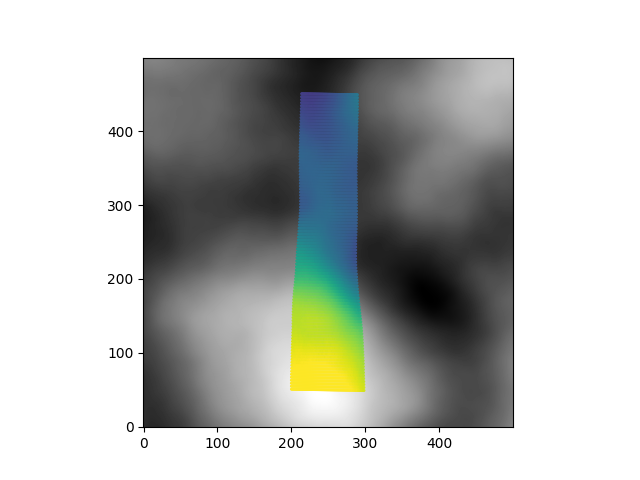

In [6]:
fig,ax = plt.subplots(1)
ax.imshow(grid_view.T,cmap='gray',origin='lower')

for t in teach:
    ax.scatter(t[:,0],t[:,1],c=t[:,2],s=1,vmin=80,vmax=120)
    


In [7]:
teach_points = np.array(teach).reshape(-1,3)
teach_tree = KDTree(teach_points)

In [8]:
repeat = bty.mb_sample(250,250,1,sensor=False)

In [20]:
repeat = bty.mb_sample(250,250,1,sensor=False)


d,i = teach_tree.query(repeat + [0,0,0],k=1)
print(d.mean())
d,i = teach_tree.query(repeat + [0,1,0],k=1)
print(d.mean())


2.0276500854599266
1.052428826181065


In [13]:
repeat = bty.mb_sample(250,250,10,sensor=False)
d, i = teach_tree.query(repeat,k=1)
print(d.mean(), teach_tree.data[i])

1.0462060510188 [[210.1689687  256.7558593   97.75812893]
 [210.82306001 256.74444209  97.80608437]
 [211.47715132 256.73302489  97.85360121]
 [212.13124262 256.72160768  97.71256286]
 [212.78533393 256.71019047  97.86542144]
 [213.43942524 256.69877327  97.77446862]
 [214.09351654 256.68735606  97.70657505]
 [214.74760785 256.67593885  97.62155947]
 [215.40169916 256.66452165  97.49160171]
 [216.05579047 256.65310444  97.46215688]
 [216.70988177 256.64168724  97.42682766]
 [217.36397308 256.63027003  97.39680378]
 [218.01806439 256.61885282  97.40927603]
 [218.6721557  256.60743562  97.18330084]
 [219.326247   256.59601841  97.30208566]
 [219.98033831 256.5846012   97.28006157]
 [220.63442962 256.573184    97.47884837]
 [221.28852093 256.56176679  97.27136133]
 [221.28852093 256.56176679  97.27136133]
 [222.59670354 256.53893238  97.1812085 ]
 [223.25079485 256.52751517  97.24177168]
 [223.25079485 256.52751517  97.24177168]
 [224.28249078 252.46910281  97.77996436]
 [224.93818157 252